# RecDP LLM - Perplexity Assessment

This component is using sentencepiece model to get the perplexity of each text sample.

# Get Started

## 1. Install pyrecdp and dependencies

In [ ]:
! DEBIAN_FRONTEND=noninteractive apt-get install -qq -y openjdk-8-jre
! pip install -q pyrecdp --pre
# ! pip install 'git+https://github.com/intel/e2eAIOK.git#egg=pyrecdp&subdirectory=RecDP'

## 2. Prepare your data

In [1]:
%mkdir -p /content/test_data
%cd /content/test_data
!wget https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/arxiv_sample_100.jsonl
!wget https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/github_sample_50.jsonl
!wget https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/tiny_c4_sample.jsonl

/content/test_data
--2023-11-10 06:52:03--  https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/arxiv_sample_100.jsonl
Resolving proxy-prc.intel.com (proxy-prc.intel.com)... 10.240.252.16
Connecting to proxy-prc.intel.com (proxy-prc.intel.com)|10.240.252.16|:912... connected.
Proxy request sent, awaiting response... 200 OK
Length: 5799643 (5.5M) [text/plain]
Saving to: ‘arxiv_sample_100.jsonl’

arxiv_sample_100.js 100%[===================>]   5.53M  3.64MB/s    in 1.5s    

2023-11-10 06:52:06 (3.64 MB/s) - ‘arxiv_sample_100.jsonl’ saved [5799643/5799643]

--2023-11-10 06:52:07--  https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/github_sample_50.jsonl
Resolving proxy-prc.intel.com (proxy-prc.intel.com)... 10.240.252.16
Connecting to proxy-prc.intel.com (proxy-prc.intel.com)|10.240.252.16|:912... connected.
Proxy request sent, awaiting response... 200 OK
Length: 227913 (223K) [text/plain]
Saving to: ‘github_sample_50.jsonl’

githu

## 3. Perplexity Assessment

### 3.1 Process with perplexity scorer

In [3]:
from pyrecdp.LLM import TextPipeline, ResumableTextPipeline
from pyrecdp.primitives.operations import *

pipeline = ResumableTextPipeline()
pipeline.enable_statistics()
ops = [
    JsonlReader("/content/test_data/"),
    TextPerplexityScore(language='en'),
    ParquetWriter("ResumableTextPipeline_output")
]
pipeline.add_operations(ops)
ret = pipeline.execute()
del pipeline

2023-11-10 07:02:05.410 | WARNING  | pyrecdp.LLM.TextPipeline:enable_statistics:214 - Enabling this option will result in a decrease in execution speed


2023-11-10 07:02:05,572	INFO read_api.py:406 -- To satisfy the requested parallelism of 192, each read task output is split into 192 smaller blocks.
2023-11-10 07:02:05,587	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadJSON->SplitBlocks(192)] -> TaskPoolMapOperator[Map(<lambda>)]
2023-11-10 07:02:05,588	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2023-11-10 07:02:05,590	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


[DatasetReader, PerfileSourcedJsonlReader, TextPerplexityScore, PerfileParquetWriter]


Running 0:   0%|          | 0/36864 [00:00<?, ?it/s]

ResumableTextPipeline, current on arxiv_sample_100.jsonl:   0%|          | 0/1 [00:00<?, ?it/s]2023-11-10 07:02:06,218	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadJSON->SplitBlocks(192)] -> TaskPoolMapOperator[Map(<lambda>)->Map(<lambda>)] -> AllToAllOperator[Aggregate] -> LimitOperator[limit=1]
2023-11-10 07:02:06,220	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2023-11-10 07:02:06,221	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


- Aggregate 1:   0%|          | 0/36864 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/36864 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/36864 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

2023-11-10 07:02:37,458	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadJSON->SplitBlocks(192)] -> TaskPoolMapOperator[Map(<lambda>)->Map(<lambda>)] -> AllToAllOperator[Aggregate] -> LimitOperator[limit=1]
2023-11-10 07:02:37,461	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2023-11-10 07:02:37,462	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


- Aggregate 1:   0%|          | 0/36864 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/36864 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/36864 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

2023-11-10 07:03:07,468	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadJSON->SplitBlocks(192)] -> TaskPoolMapOperator[Map(<lambda>)->Map(<lambda>)] -> AllToAllOperator[Aggregate] -> LimitOperator[limit=1]
2023-11-10 07:03:07,470	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2023-11-10 07:03:07,472	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


- Aggregate 1:   0%|          | 0/36864 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/36864 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/36864 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

2023-11-10 07:03:37,636	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadJSON->SplitBlocks(192)] -> TaskPoolMapOperator[Map(<lambda>)->Map(<lambda>)] -> AllToAllOperator[Aggregate] -> LimitOperator[limit=1]
2023-11-10 07:03:37,638	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2023-11-10 07:03:37,639	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


- Aggregate 1:   0%|          | 0/36864 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/36864 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/36864 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

2023-11-10 07:04:07,584	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadJSON->SplitBlocks(192)] -> TaskPoolMapOperator[Map(<lambda>)->Map(<lambda>)]
2023-11-10 07:04:07,586	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2023-11-10 07:04:07,588	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


Running 0:   0%|          | 0/36864 [00:00<?, ?it/s]

2023-11-10 07:04:37,640	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadJSON->SplitBlocks(192)] -> TaskPoolMapOperator[Map(<lambda>)->Map(<lambda>)->Write]
2023-11-10 07:04:37,642	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2023-11-10 07:04:37,643	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


Running 0:   0%|          | 0/36864 [00:00<?, ?it/s]

(Map(<lambda>)->Map(<lambda>)->Write pid=8880) Skipping writing empty dataset with UUID 088e85bebc8a4a909e30ea15d936129b at ResumableTextPipeline_output/arxiv_sample_100.jsonl
(Map(<lambda>)->Map(<lambda>)->Write pid=8715) Skipping writing empty dataset with UUID 088e85bebc8a4a909e30ea15d936129b at ResumableTextPipeline_output/arxiv_sample_100.jsonl [repeated 57x across cluster]


2023-11-10 07:05:07.485 | INFO     | pyrecdp.LLM.TextPipeline:execute:347 - TextPerplexityScore: A total of 100 rows of data were processed, using 151.41499948501587 seconds, Get max perplexity 5311.6, Get min perplexity 864.8, Get average perplexity 1975.2919999999986,Get the std of perplexity 777.4097633406551
2023-11-10 07:05:07.487 | INFO     | pyrecdp.LLM.TextPipeline:execute:347 - PerfileParquetWriter: A total of 0 rows of data were processed, using 0 seconds, with 0 rows modified or removed, 0 rows of data remaining.


ResumableTextPipeline, current on arxiv_sample_100.jsonl: 100%|██████████| 1/1 [03:01<00:00, 181.27s/it]

2023-11-10 07:05:07.490 | INFO     | pyrecdp.LLM.TextPipeline:execute:409 - Completed! ResumableTextPipeline will not return dataset, please check ResumableTextPipeline_output for verification.



(Map(<lambda>)->Map(<lambda>)->Write pid=8712) Skipping writing empty dataset with UUID 088e85bebc8a4a909e30ea15d936129b at ResumableTextPipeline_output/arxiv_sample_100.jsonl [repeated 34x across cluster]


### 3.2 View processed data

In [3]:
import pandas as pd
arxiv_perplexity_pd = pd.read_parquet("ResumableTextPipeline_output/arxiv_sample_100.jsonl")
arxiv_perplexity_pd.head()

,text,meta,source_id,perplexity
0,\section{Introduction}\n\label{sec:intro}\n\n\...,"{'timestamp': '2022-03-30T02:27:00', 'yymm': '...",tiny_c4_sample.jsonl,1075.4
1,\section{Introduction}\n\nOne of the fundament...,"{'timestamp': '1998-07-19T14:33:52', 'yymm': '...",tiny_c4_sample.jsonl,1623.4
2,\section{Introduction}\n\nContinuous Engineeri...,"{'timestamp': '2020-08-18T02:18:33', 'yymm': '...",tiny_c4_sample.jsonl,2086.8
3,\section{Introduction}\nWhen granular material...,"{'timestamp': '2002-03-19T12:47:20', 'yymm': '...",tiny_c4_sample.jsonl,1758.4
4,\section{\label{sec:intro}Introduction}\n \nDe...,"{'timestamp': '2022-10-20T02:16:28', 'yymm': '...",tiny_c4_sample.jsonl,1683.1


In [4]:
import pandas as pd
github_perplexity_pd = pd.read_parquet("ResumableTextPipeline_output/github_sample_50.jsonl")
github_perplexity_pd.head()

,text,meta,source_id,perplexity
0,var videoState={\n\n \n create: function...,{'content_hash': '1c932c7359417cc3e05f3380eabb...,tiny_c4_sample.jsonl,4389.1
1,package mts\n\n//Licensed under the Apache Lic...,{'content_hash': '4765aae0af2406ea691fb001ea5a...,tiny_c4_sample.jsonl,2111.4
2,<!DOCTYPE html>\n<html>\n<head>\n <meta cha...,{'content_hash': '324efbc1ad28fdfe902cd1e51f7e...,tiny_c4_sample.jsonl,3016.7
3,"import os\nfrom flask import Flask,render_temp...",{'content_hash': 'a9735eefc6ff4807441825a5f281...,tiny_c4_sample.jsonl,3719.8
4,/*\n * String hash computation (interning).\n...,{'content_hash': 'bab3317c67f40063ff7a69f3bcc7...,tiny_c4_sample.jsonl,4478.0


In [6]:
import pandas as pd
c4_perplexity_pd = pd.read_parquet("ResumableTextPipeline_output/tiny_c4_sample.jsonl")
c4_perplexity_pd.head()

,text,meta,source_id,perplexity
0,lorazepam nombre comercial mexico From an inte...,"{""timestamp"":""2019-04-24T02:17:53Z"",""url"":""htt...",tiny_c4_sample.jsonl,613.2
1,It is possible to love someone who does not lo...,"{""timestamp"":""2019-04-23T06:32:35Z"",""url"":""htt...",tiny_c4_sample.jsonl,295.8
2,Canon PIXMA TS9520 All-in-One Print / Scan / C...,"{""timestamp"":""2019-04-25T17:03:36Z"",""url"":""htt...",tiny_c4_sample.jsonl,2073.5
3,For those who plan on buying an iPad this Satu...,"{""timestamp"":""2019-04-22T22:39:52Z"",""url"":""htt...",tiny_c4_sample.jsonl,970.4
4,"After tipping 25 tokens in a day, you'll be ab...","{""timestamp"":""2019-04-20T00:25:13Z"",""url"":""htt...",tiny_c4_sample.jsonl,1408.2


## 3.3 Visualization

<AxesSubplot:title={'center':'Perplexity score of datasets'}>

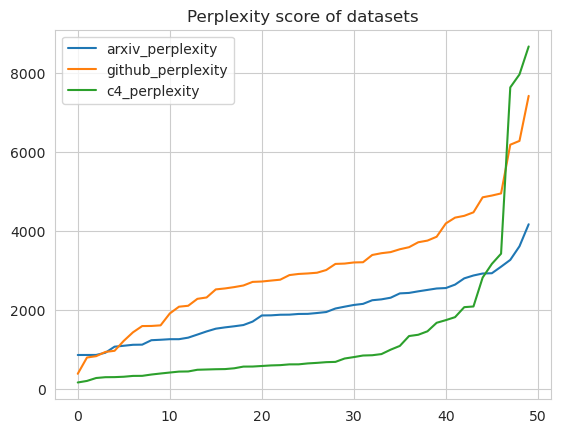

In [7]:
from pandas import DataFrame
score_df = DataFrame(dict(arxiv_perplexity = arxiv_perplexity_pd["perplexity"].sample(50).sort_values(ascending=True).reset_index(drop=True),
               github_perplexity = github_perplexity_pd["perplexity"].sample(50).sort_values(ascending=True).reset_index(drop=True),
               c4_perplexity = c4_perplexity_pd["perplexity"].sample(50).sort_values(ascending=True).reset_index(drop=True)))
score_df.plot(y=["arxiv_perplexity", "github_perplexity", "c4_perplexity"], kind="line", title="Perplexity score of datasets")